In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [57]:
# Load dataset

df = pd.read_csv("yahoo_stock.csv")

# Display the first few rows of the dataset
print(df.head())

         Date         High          Low         Open        Close  \
0  2015-11-23  2095.610107  2081.389893  2089.409912  2086.590088   
1  2015-11-24  2094.120117  2070.290039  2084.419922  2089.139893   
2  2015-11-25  2093.000000  2086.300049  2089.300049  2088.870117   
3  2015-11-26  2093.000000  2086.300049  2089.300049  2088.870117   
4  2015-11-27  2093.290039  2084.129883  2088.820068  2090.110107   

         Volume    Adj Close  
0  3.587980e+09  2086.590088  
1  3.884930e+09  2089.139893  
2  2.852940e+09  2088.870117  
3  2.852940e+09  2088.870117  
4  1.466840e+09  2090.110107  


In [59]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if any)
df = df.dropna()

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataset by date
df = df.sort_values('Date')

# Display dataset info
print(df.info())

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1825 non-null   datetime64[ns]
 1   High       1825 non-null   float64       
 2   Low        1825 non-null   float64       
 3   Open       1825 non-null   float64       
 4   Close      1825 non-null   float64       
 5   Volume     1825 non-null   float64       
 6   Adj Close  1825 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 99.9 KB
None


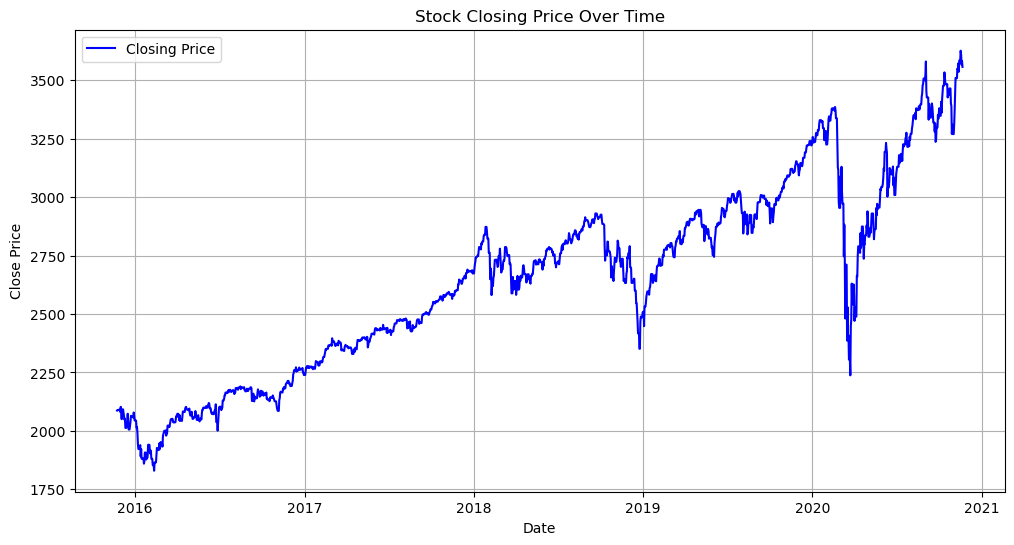

In [61]:
# Data Visualization
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Stock Closing Price Over Time")
plt.legend()
plt.grid()
plt.show()


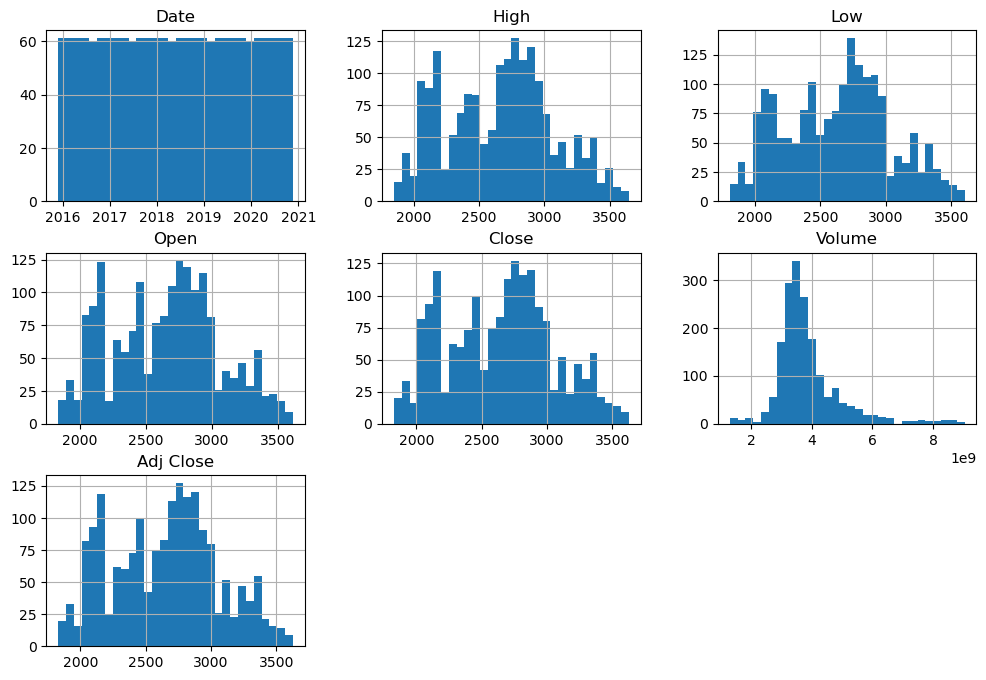

In [63]:
# Histogram for distributions
df.hist(figsize=(12, 8), bins=30)
plt.show()


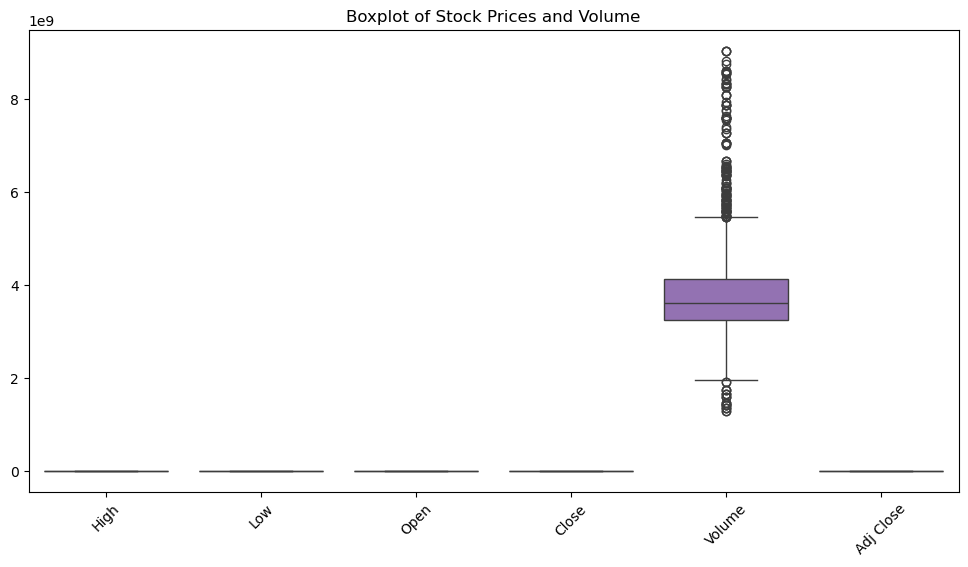

In [65]:
# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']])
plt.xticks(rotation=45)
plt.title("Boxplot of Stock Prices and Volume")
plt.show()

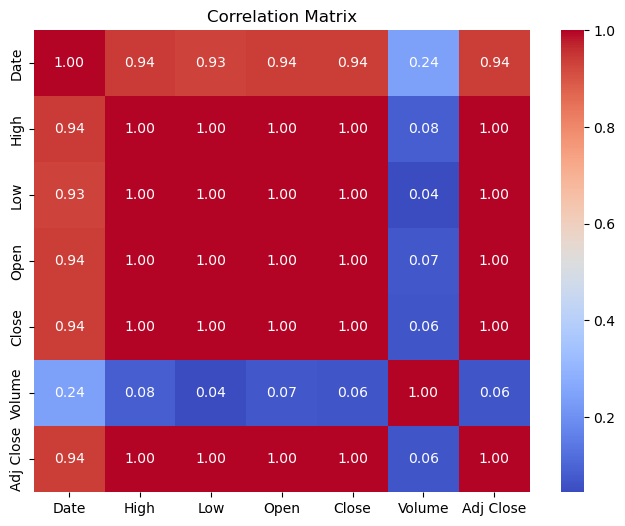

In [67]:
# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [69]:
# Feature Selection & Splitting Data
X = df[['High', 'Low', 'Open', 'Volume', 'Adj Close']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [73]:
# Model Prediction
y_pred = model.predict(X_test)

In [75]:
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Absolute Error: 1.5907411181291386e-09
Mean Squared Error: 5.165079164509232e-18
R-squared Score: 1.0


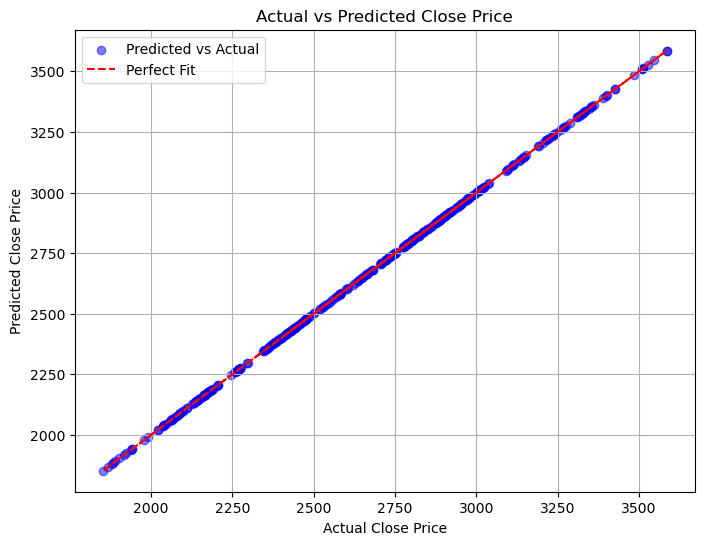

In [77]:
# Visualization of Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predicted vs Actual")
plt.plot(y_test, y_test, color='red', linestyle='dashed', label="Perfect Fit")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Price")
plt.legend()
plt.grid()
plt.show()

In [79]:
#model accuracy
accuracy = model.score(X_test, y_test) * 100
print(accuracy)

100.0
